# Sentiment analysis with Logistic Regression

### Some plotting functions

In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

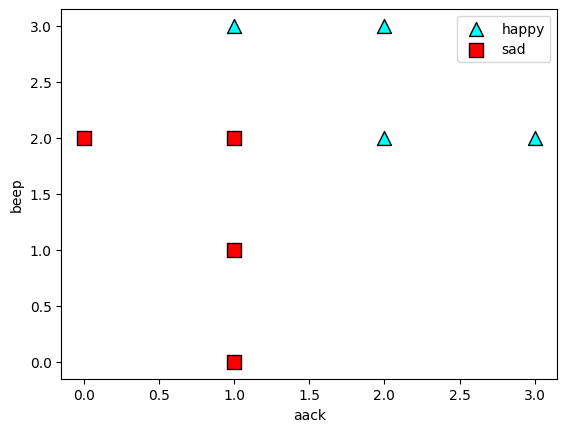

In [4]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [5]:
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    score_value = score(weights, bias, features)
    output = sigmoid(score_value)
    return output

def log_loss(weights, bias, features, label):
    predicted = prediction(weights, bias, features)
    output = ((-label)*np.log(predicted))-((1-label)*np.log(1-predicted))
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [6]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    predicted = prediction(weights, bias, features)
    error = label - predicted
    for i in range(len(weights)):
      weights[i] = weights[i] + learning_rate*error*features[i]
      bias = bias + learning_rate*error
    return weights, bias

In [7]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

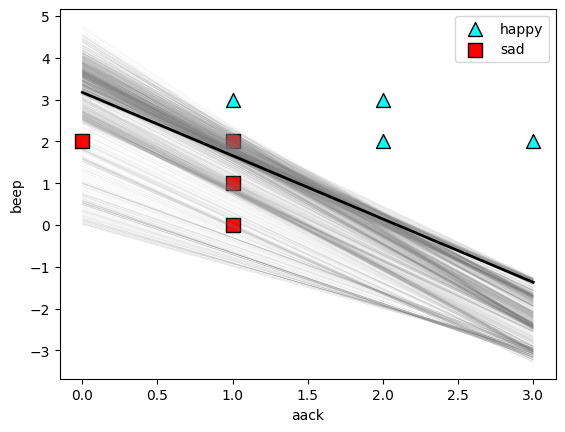

([1.1050169643394707, 0.7294272919650137], -2.3144555373484064)

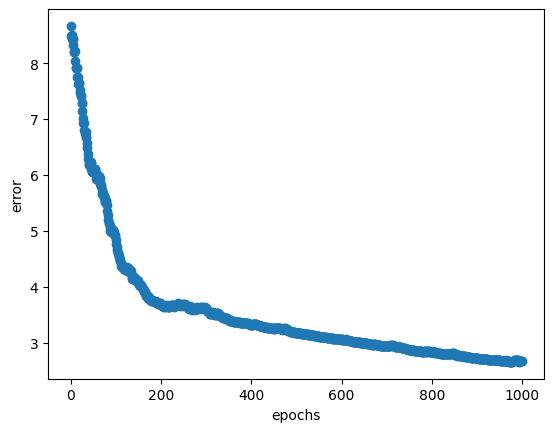

In [8]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [9]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(features, labels)

LogisticRegression()

In [10]:
clf.score(features, labels)

1.0

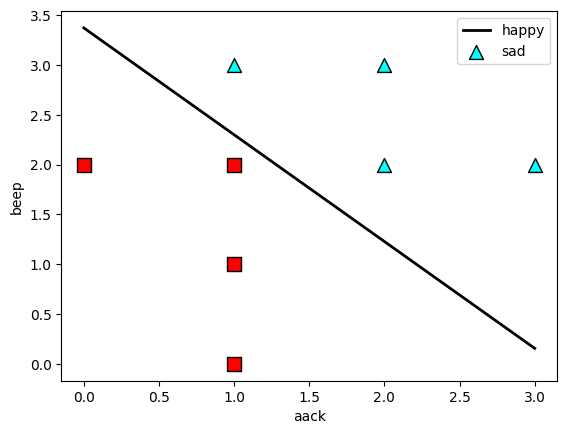

In [11]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

### Real Example (Breast Cancer)

In [12]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [15]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
# Extract features and labels
x_train, y_train = train_dataset[['radius_mean']], train_dataset['diagnosis']
x_test, y_test = test_dataset[['radius_mean']], test_dataset['diagnosis']

# Convert labels to binary values
y_train = y_train.map({'B': 0, 'M': 1})
y_test = y_test.map({'B': 0, 'M': 1})

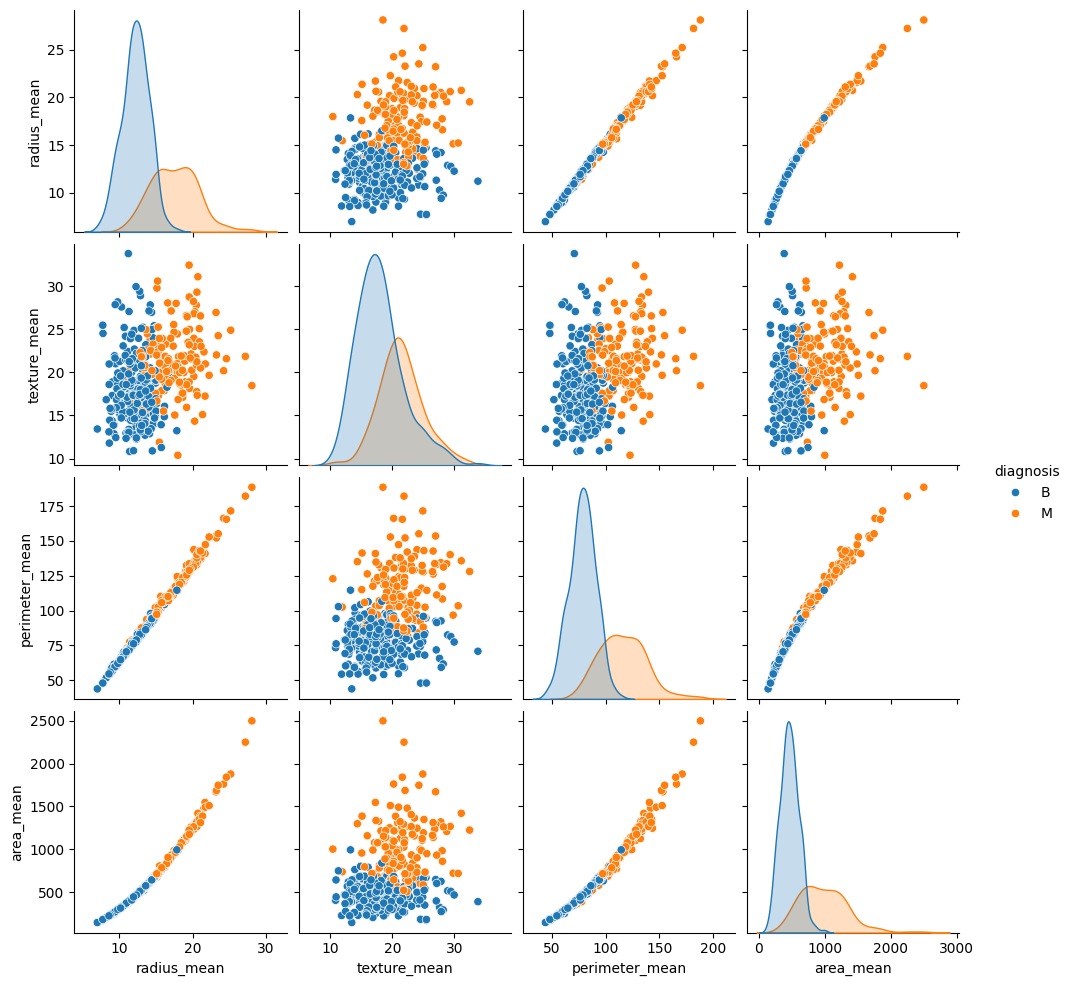

In [18]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis');

In [22]:
# Initialize Logistic Regression model with 'sag' solver
log_reg_model = LogisticRegression(solver='sag')

In [23]:
# use only "radius_mean" feature

# Train the model
log_reg_model.fit(x_train, y_train)

# Make predictions
train_predictions = log_reg_model.predict(x_train)
test_predictions = log_reg_model.predict(x_test)

# Calculate accuracy
train_accuracy = (train_predictions == y_train).mean()
test_accuracy = (test_predictions == y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9156908665105387
Testing Accuracy: 0.9366197183098591


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
# use all data
from sklearn.metrics import accuracy_score

# Split the dataset into features and labels
X = dataset.iloc[:, 2:]
y = dataset.iloc[:, 1]

# Convert labels to binary values
y = y.map({'B': 0, 'M': 1})

# Fit the model
log_reg_model.fit(X, y)

# Make predictions
predictions = log_reg_model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9173989455184535


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
# use all data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_feat = scaler.fit_transform(X)
# Fit the model
log_reg_model.fit(standard_feat, y)

# Make predictions
predictions = log_reg_model.predict(standard_feat)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9876977152899824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
